Going through experimental data collected in lab using different material substrates and coatings 
 used for soft neural interface device
with Ben Rees

--------------------

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
gray = '#758A93'
cream = '#ECD5BC'
yellow = '#E9B63B'
red = '#C66E52'

# all mm
polyimide_li = 19.00
polyimide_w = 5.18
polyimide_t = 15e-3

kirigami_li = 23.79
kirigami_w = 5  # guessing from slide - which one did we use?
kirigami_t = 25.4e-3

pdms_li = 22.38
pdms_w = 5.6
pdms_t = 1024.5e-3

kirigami_lf = 4838e-3
polyimide_lf = 53.8e-3
pdms_lf = 3588.7e-3



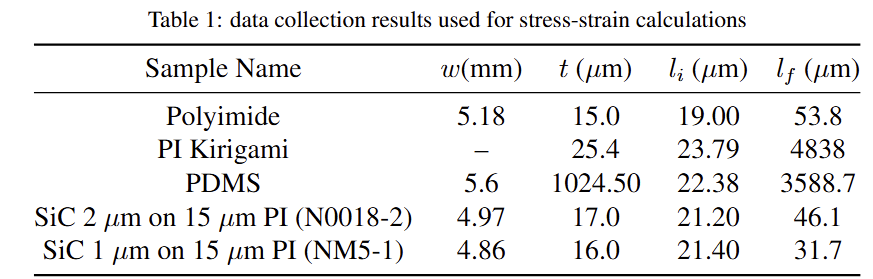

1. Test bulk substrates (PI, silicone, kirigami PI). Plot engineering stress–strain curves to failure at a
fixed displacement rate and compare mechanical properties. Include elongation limit, elastic modulus,
tensile strength, and toughness.

$\epsilon = \frac{\Delta L}{L_0} = \frac{extension - original}{original}$


$\sigma = \frac{F}{A_0} = \frac{force}{original cross-sectional area}$

In [42]:
kirigami_data = pd.read_excel('data/kirigami.xlsx', sheet_name='cleaned')
polyimide_data = pd.read_excel('data/polyimide.xlsx', sheet_name='cleaned')
pdms_data = pd.read_excel('data/PDMS.xlsx', sheet_name='cleaned')

In [43]:
kirigami_data['strain'] = (kirigami_data['extension']/1e3) / kirigami_li
kirigami_data['stress'] = kirigami_data['force'] / (kirigami_w * kirigami_t)

polyimide_data['strain'] = (polyimide_data['extension']/1e3) / polyimide_li
polyimide_data['stress'] = polyimide_data['force'] / (polyimide_w * polyimide_t)

pdms_data['strain'] = (pdms_data['extension']/1e3) / pdms_li
pdms_data['stress'] = pdms_data['force'] / (pdms_w * pdms_t)

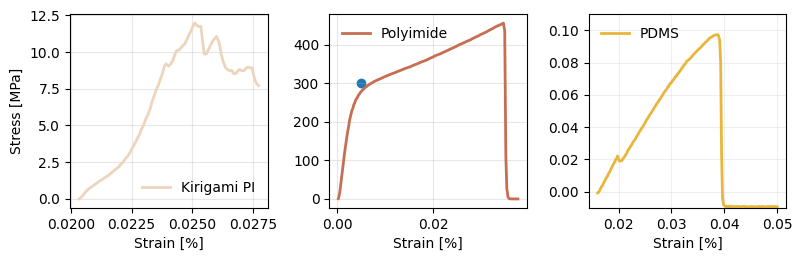

In [ ]:
# plot stress vs strain, all three
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 8/3))

ax1.plot(100*kirigami_data['strain'][:-150], kirigami_data['stress'][:-150],
          color = cream, linewidth=2, label='Kirigami PI')
ax1.set_xlabel('Strain [%]')
ax1.set_ylabel('Stress [MPa]')
ax1.grid(True, alpha=0.3)
ax1.legend(frameon=False)

ax2.plot(100*polyimide_data['strain'], polyimide_data['stress'],
          color = red, linewidth=2, label='Polyimide')
ax2.set_xlabel('Strain [%]')
ax2.grid(True, alpha=0.3)
# ax2.scatter([0.005], [300]) # to mark yield point
ax2.legend(frameon=False)

ax3.plot(100*pdms_data['strain'], pdms_data['stress'],
          color = yellow, linewidth=2, label='PDMS')
ax3.set_xlabel('Strain [%]')
ax3.set_ylim(-0.01, 0.11)
ax3.grid(True, alpha=0.2)
ax3.legend(frameon=False)
plt.tight_layout()
# fig.savefig('figs/stress_strain.png', dpi=300)


modulus of elasticity

In [55]:
pdms_strain_limit = 0.00035
kirigimi_strain_limit = 0.00025
polyimide_strain_limit = 0.00005

pdms_linear_mask = pdms_data['strain'] <= pdms_strain_limit
pdms_slope, _ = np.polyfit(pdms_data['strain'][pdms_linear_mask], pdms_data['stress'][pdms_linear_mask], 1)
pdms_modulus = pdms_slope

kirigami_linear_mask = kirigami_data['strain'] <= kirigimi_strain_limit
kirigami_slope, _ = np.polyfit(kirigami_data['strain'][kirigami_linear_mask], kirigami_data['stress'][kirigami_linear_mask], 1)
kirigami_modulus = kirigami_slope

polyimide_linear_mask = polyimide_data['strain'] <= polyimide_strain_limit
polyimide_slope, _ = np.polyfit(polyimide_data['strain'][polyimide_linear_mask], polyimide_data['stress'][polyimide_linear_mask], 1)
polyimide_modulus = polyimide_slope

print(f'PDMS Modulus: {pdms_modulus:.2f} MPa')
print(f'Kirigami PI Modulus: {kirigami_modulus:.2f} MPa')
print(f'Polyimide Modulus: {polyimide_modulus:.2f} MPa')

PDMS Modulus: 476.77 MPa
Kirigami PI Modulus: 264418.06 MPa
Polyimide Modulus: 6323998.50 MPa


2. Test bilayer films (SiC on PI). Compare the stress–strain behavior to that of the bulk PI substrate. Estimate the coating (SiC) modulus and compare it with literature values for the encapsulation material. If errors occur in extracting the coating modulus, briefly explain likely causes.

3. Cracking analysis from recordings (SiC on PI): Include image arrays from the recording files at 0% strain and Stages I, II, III. Calculate and report crack-onset strain, εc, critical energy release rate, Gc, crack density at saturation CDsat, critical stress-transfer length lc, and interfacial shear strength (IFSS). Compare the adhesion level with other film-substrate interface materials.

4. Nanocomposite comparison [no test; please use files provided]: Review the recordings for MMT nanoclay-PVA nanocomposites on PET. Describe how their crack evolution differs from SiC on PI. Show Stages I–III. If the stages are not clearly distinguishable, discuss possible reasons.